### Table of contents
01. Importing Libraries
02. Importing Data Set
03. Charts
    - 3.1 Histogram
    - 3.2 Bar
    - 3.3 Line    
       - 3.3.1 Order_hour_of_day vs prices    
       - 3.3.2 Customer age and number of dependents
    - 3.4 Scatter Plot
04. Exporting Plots

# 01. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Set(s)

In [4]:
# Creating a path variable as a short cut for future importing of data
path = r'/Users/tuor/DA Projects/230321 Instacart Basket Analysis'

In [5]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '230331_orders_products_customers_merged.pkl'))

In [6]:
customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '230330_customers.pkl'))

# 03. Charts

## 03.1 Histogram

Text(0, 0.5, 'Frequency')

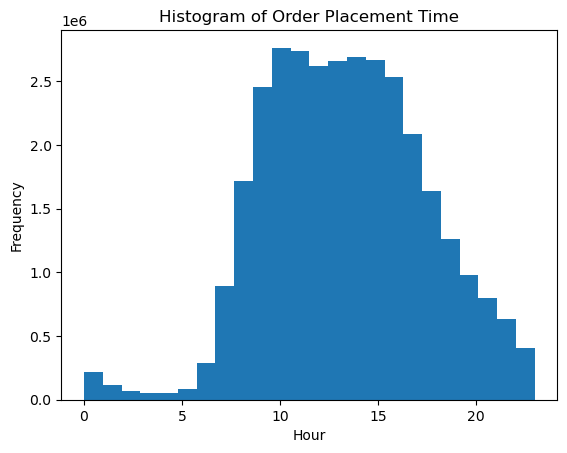

In [7]:
# histogram of order_hour of _day
hist_hours = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

# Set the title and axis labels
plt.title('Histogram of Order Placement Time')
plt.xlabel('Hour')
plt.ylabel('Frequency')

The histogram above indicates that the greatest frequency of activity 1.5le6 or higher occurs between 9am and 7pm. Consistent maximum of roughly 2.5le6  or higher between 10am and 5pm.

## 03.2 Bar

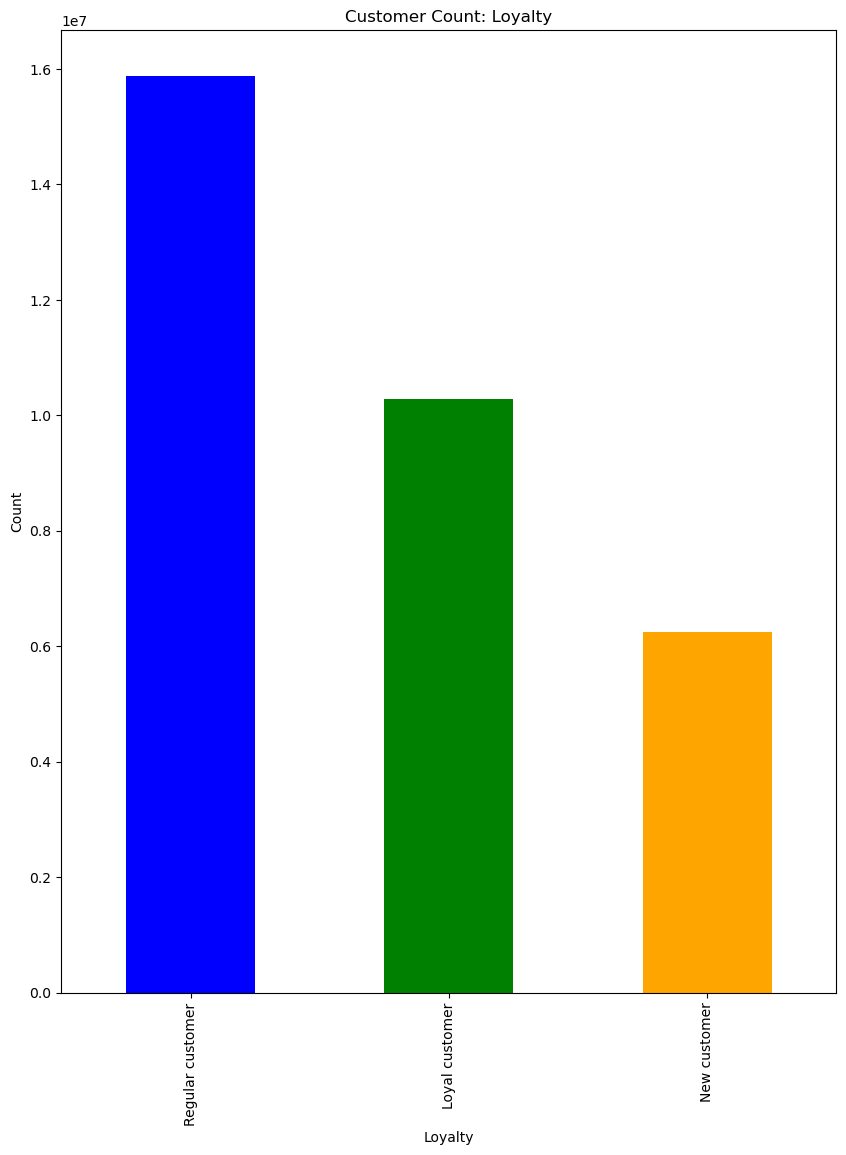

In [39]:
# Creating a bar chart of loyalty of customers with color to distiguish
customer_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['Blue', 'Green', 'Orange'])

# Set the title and axis labels
plt.title('Customer Count: Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Count')

# set the figure size and DPI
customer_loyalty.get_figure().set_size_inches(10, 12.5)

## 03.3 Line

In [11]:
# Creating a list holding True/False values to the test np.random.rant( <= 0.7)
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [12]:
# Storing 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

In [13]:
# Storing 30% of the sample in the dataframe small

small = ords_prods_cust[~dev]

In [14]:
len(ords_prods_cust)

32406041

In [15]:
len(big) + len(small)

32406041

### 03.3.1 Order_hour_of_day vs prices

In [16]:
# Selecting only the columns needed to improve processing time
df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Average Product Purchase Price by Hour of Day')

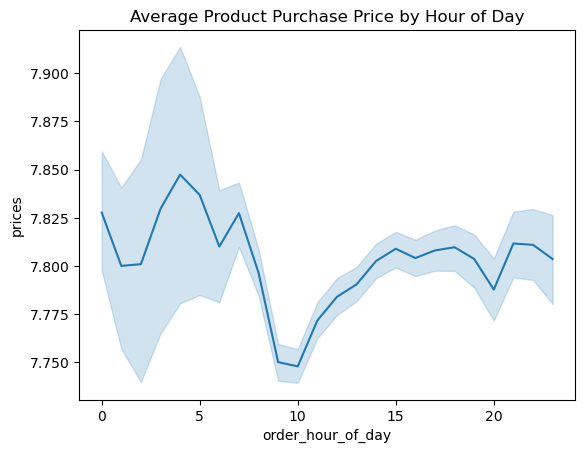

In [18]:
# Line plot of order_hour_of_day vs prices
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Set the title and axis labels
plt.title('Average Product Purchase Price by Hour of Day')

The line chart above indicates a drop in average price of purchased products between 8am and 2pm. The shaded area around the line is the 95% confidence interval of where the actual value would be showing we are more confident with the data after 6am.

### 03.3.2 Customer age and number of dependents

In [19]:
# Determining if a sample needs to be taken based on size of data frame
customer.shape

(206209, 10)

Text(0.5, 1.0, 'Dependents by Age')

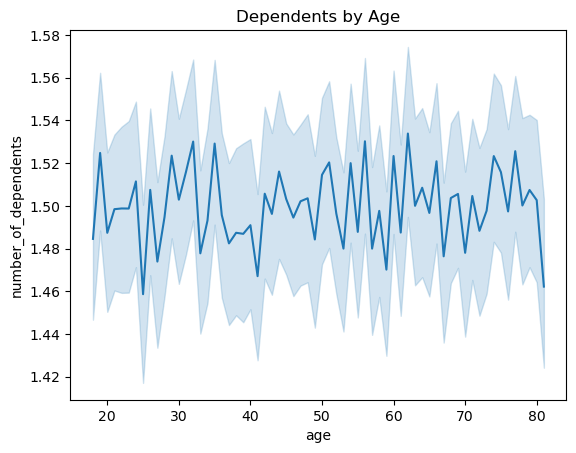

In [20]:
# Line plot of order_hour_of_day vs prices
line_age_n_dep = sns.lineplot(data = customer, x = 'age',y = 'number_of_dependents')

# Set the title and axis labels
plt.title('Dependents by Age')

From the line chart above, there is no clear relationship between age and number of dependents

# 03.4 Scatter Plot

Text(0.5, 1.0, 'Income by Age')

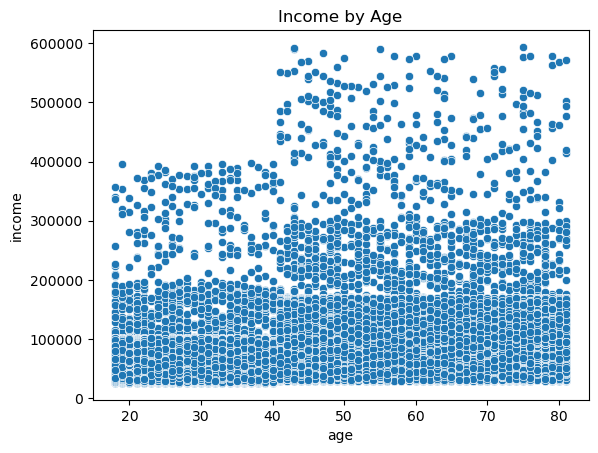

In [21]:
#Scatter plot of age vs income
age_income = sns.scatterplot(x = 'age', y = 'income',data = customer)

# Set the title and axis labels
plt.title('Income by Age')

The scatter plot shows that as age go up there is a larger density of individuals with higher incomes. Notably no one below 40 has broken 400000 a year and the general density of 200000 to 300000 increases past 40 as well.

# 04. Exporting Plots

In [22]:
# Saving the histogram figure to Visualizations folder
hist_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours_of_day.png'))

In [40]:
# Saving the bar figure of customer loyalty to Visualizations folder
customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_loyalty.png'))

In [23]:
# Saving the line figure to Visualizations folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_of_day_and_prices.png'))

In [24]:
# Saving the line figure to Visualizations folder
line_age_n_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_and_n_dependents.png'))

In [25]:
# Saving the scatter plot figure to Visualizations folder
age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_age_and_income.png'))